# 分类问题的评估方法
使用乳腺癌数据集，把目标变量(类别标签数据)反转，将恶性视为1(阳性)，将良性视为0(阴性)，因为在实际治疗中，一般将恶性肿瘤作为检查目标。

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data
y = 1 - data.target # 反转标签的0和1
model = LogisticRegression(max_iter=10000)
model.fit(X, y)
y_pred = model.predict(X)

## 混淆矩阵 confusion matrix
混淆矩阵以表格的形式将分类结果显示出来，就可以检查哪些标签分类正确哪些分类错误。
* 左上角的(True Negative）指的是阴性数据实际被正确预测为阴性的情况（正确判断为良性)。
* 右上角的FP(False Positive）指的是阴性数据实际被错误地预测为阳性的情况（良性被判断为恶性)。
* 左下角的FN(False Negative)指的是阳性数据实际被错误地预测为阴性的情况（恶性被判断为良性)。
* 右下角的TP(True Positive）指的是阳性数据实际被正确预测为阳性的情况（正确判断为恶性)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[348   9]
 [ 15 197]]


## 正确率 accuracy
指预测正确的结果占总预测结果的比例。

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9578207381370826

## 精确率 precision
指在所有被预测为阳性的数据中，被正确预测为阳性的数据所占的比例。

In [48]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.9563106796116505

## 召回率 recall
指在实际为阳性的数据中，被正确预测为阳性的数据所占的比例。

In [49]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.9292452830188679

## F值 f1-score
指综合反映精确率和召回率两个趋势的指标。

In [50]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.9425837320574162

## 预测概率
scikit-learn的predict方法使用的是基于阈值0.5输出的判断结果，为了尽量避免漏掉恶性病例，我们考虑预测概率的第2个元素（即预测恶性的概率），将阈值设为0.1

In [51]:
print(model.predict_proba(X))

import numpy as np
y_pred2 = (model.predict_proba(X)[:, 1] > 0.1).astype(np.int)
print(confusion_matrix(y, y_pred2))
print(accuracy_score(y, y_pred2))
print(recall_score(y, y_pred2))

[[2.95319325e-14 1.00000000e+00]
 [3.78106635e-06 9.99996219e-01]
 [5.29694138e-07 9.99999470e-01]
 ...
 [2.14170749e-03 9.97858293e-01]
 [7.48885398e-11 1.00000000e+00]
 [9.99875075e-01 1.24924796e-04]]
[[319  38]
 [  1 211]]
0.9314586994727593
0.9952830188679245


可以看到右下角FN（实际为1却被错误预测为0的数据减少了），而正确率下降，召回率提高了

## ROC曲线和AUC
当阳性数据和阴性数据的数量有很大偏差的时候，以上这些指标往往不能很好地发挥效果。在实际工作中，由于这种大偏差的数据而训练出来的模型计算出高正确率的情况经常出现。  
应对数据不均衡问题的指标有AUC（曲线下面积），AUC指的是ROC曲线下的面积，这里的ROC曲线横轴为假阳性率(FP的占比)，纵轴为真阳性率(TP的占比)，图中显示了当预测数据为阳性的预测概率的阈值从1开始逐渐下降时，FP和TP之间关系的变化。

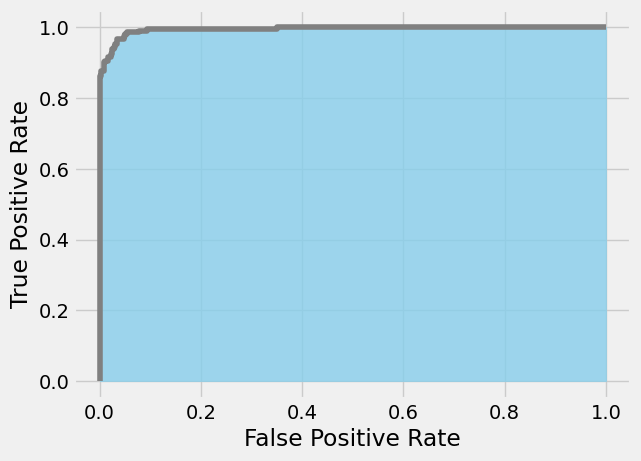

In [52]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# roc_curve()的输入是目标变量(类别标签数据)和预测概率
probas = model.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

# 在matplotlib中对fpr和tpr进行可视化
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

ROC曲线下方的面积是AUC。面积最大值为1，最小为0。AUC越接近1，说明精度越高；如果其值在0.5左右，则得到的分类模型和抛硬币随机决定良性恶性没有多大区别。

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:, 1])

0.9946884414143016

# 回归问题的评估方法

In [55]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

data = load_boston()
X = data.data[:, [5]]
y = data. target
model = LinearRegression ()
model.fit (X, y)
y_pred = model.predict (X)

print(model.coef_)  # 斜率
print(model.intercept_) # 截距

[9.10210898]
-34.67062077643857


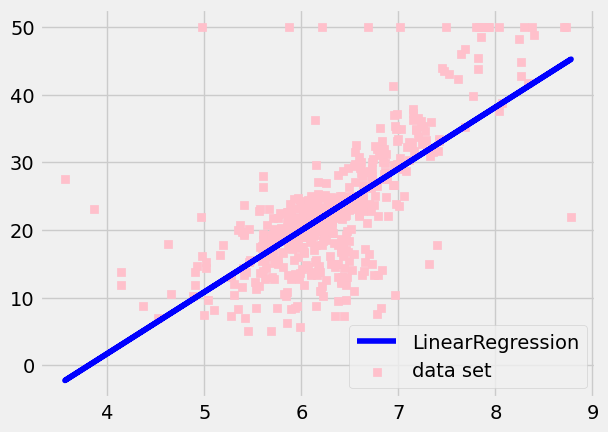

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots ()
ax.scatter (X, y, color='pink', marker='s', label='data set')
ax.plot (X, y_pred, color='blue', label='LinearRegression')
ax.legend ()
plt.show()

## 均方误差 Mean-Square Error
均方误差是一个表示实际值和预测值之间存在多大差异的数值。

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

43.60055177116956

## 决定系数
使用均方误差来表示训练好的模型的预测效果的数值。也就是R^2的系数。  
当该系数取最大值1时说明没有误差，而当误差过大也可能数值为负

In [58]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.48352545599133423

前面解释了如何使用均方误差和决定系数两个指标评估回归问题。光看均方误差的数值不能判断精度是好还是坏。如果目标变量的方差较大，均方误差也会变大。而决定系数可以使用不依赖于目标变量方差的取值范围在0和1之间的值表示，所以即使目标变量的数量级不同，也可以格决定系数作为一般的指标使用。

## 与其他算法进行比较
下面使用SVM核方法进行回归

72.14197118147209
0.14543531775956597


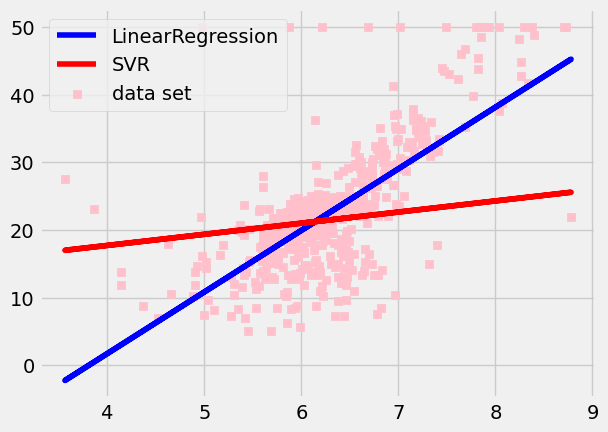

In [63]:
from sklearn.svm import SVR
model = SVR(C=0.01, kernel='linear')
model.fit(X, y)
y_svr_pred = model.predict(X)
print(mean_squared_error(y, y_svr_pred))
print(r2_score(y, y_svr_pred))

fig, ax = plt.subplots()
ax.scatter (X, y, color='pink', marker='s', label='data set')
ax.plot (X, y_pred, color='blue', label='LinearRegression')
ax.plot (X, y_svr_pred, color='red', label='SVR' )
ax.legend()
plt.show()

In [64]:
# 改变SVR的参数
model = SVR(C=1, kernel='rbf')
model.fit(X, y)
y_svr_pred = model.predict(X)
print(mean_squared_error(y, y_svr_pred))
print(r2_score(y, y_svr_pred))

37.40032481992347
0.5569708427424378


## 过拟合
模型对未知数据的预测能力叫做泛化能力，即使对训练数据的误差很小，如果发生过拟合，泛化能力也会很低。

In [67]:
train_X, test_X = X[:400], X[400:]
train_y, test_y = y[:400], y[400:]
model_svr_rbf = SVR(C=1.0, kernel='rbf')
model_svr_rbf.fit(train_X, train_y)
test_y_pred = model_svr_rbf.predict(test_X)
print (mean_squared_error(test_y, test_y_pred))
print (r2_score(test_y, test_y_pred))

69.32813164021485
-1.4534559402985217


## 交叉验证 cross validation

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

data = load_breast_cancer()
X = data.data
y = data.target
cv = KFold(5, shuffle=True)
model_rfc = RandomForestClassifier()
cross_val_score(model_rfc, X, y, cv=cv, scoring='accuracy')
# cross_val_score(model_rfc, X, y, cv=cv, scoring='f1')

array([0.92105263, 0.95614035, 0.98245614, 0.94736842, 0.96460177])

## 搜索超参数
使用网格自动搜索，对已定义好的参数列表的组合进行穷尽

In [70]:
data = load_breast_cancer()
X = data.data
y = 1 - data.target # 反转标签的0和1
X = X[:, :10]

from sklearn.model_selection import GridSearchCV
cv = KFold(5, shuffle=True)
param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [10, 20, 30]}
model_rfc = RandomForestClassifier()
grid_search = GridSearchCV(model_rfc, param_grid, cv=cv, scoring='accuracy')
# grid_search = GridSearchCV(model_rfc, param_grid, cv=cv, scoring='f1')
grid_search.fit(X, y)

# 输出为所得到的最好的得分及相应的超参数值
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9436733426486571
{'max_depth': 10, 'n_estimators': 20}
